# Type fits

## Load libraries and read file

In [70]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import seaborn as sns
import random
import sklearn
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#df_test = pd.read_spss('data/newdata/مهندسی.sav')
df_test = pd.read_excel('data/data_w_origin/GHOMOYAT.xlsx')
print(df_test.shape)

(15363, 19)


In [71]:
import re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

df_test['Sen']=df_test['Sen'].apply(lambda cw : remove_tags(cw))
#df_test.head()

def age_calc(string):
    year, month, day = string.split("/")
    year = 1401 - int(year)
    return year

df_test['Sen']=df_test['Sen'].apply(lambda cw : age_calc(cw))

In [72]:
'''
cols = ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat',
       'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat',
       'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman',
       'Mantagheh', 'GDP']
'''
cols = ['Department', 'Age', 'Grade', 'Type', 'GPA', 'Nationality',
         "Marital status", "Children", "Year", "Financial Aid", "Gender",
         "Transfer", "Drop out", "Remove", "Leave", "Change filed", "Guest",
         "Region", "Gross Domestic Product"]
df_test.columns = cols
df_test.drop(['Region', 'Gross Domestic Product'], axis=1, inplace=True)
df_test.columns
df_test = df_test.loc[~(df_test == 999).any(axis=1)]

df_test.head()

,Department,Age,Grade,Type,GPA,Nationality,Marital status,Children,Year,Financial Aid,Gender,Transfer,Drop out,Remove,Leave,Change filed,Guest
0,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0
1,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0
2,1,21,0,0,12.61,1,1,0,6,1,0,0,0,0,0,0,0
3,1,22,0,0,13.93,1,1,0,6,1,1,0,0,0,0,0,0
5,1,21,0,0,18.90,1,1,0,6,1,0,0,0,0,0,0,0


In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13709 entries, 0 to 15362
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Department      13709 non-null  int64  
 1   Age             13709 non-null  int64  
 2   Grade           13709 non-null  int64  
 3   Type            13709 non-null  int64  
 4   GPA             13709 non-null  float64
 5   Nationality     13709 non-null  int64  
 6   Marital status  13709 non-null  int64  
 7   Children        13709 non-null  int64  
 8   Year            13709 non-null  int64  
 9   Financial Aid   13709 non-null  int64  
 10  Gender          13709 non-null  int64  
 11  Transfer        13709 non-null  int64  
 12  Drop out        13709 non-null  int64  
 13  Remove          13709 non-null  int64  
 14  Leave           13709 non-null  int64  
 15  Change filed    13709 non-null  int64  
 16  Guest           13709 non-null  int64  
dtypes: float64(1), int64(16)
memory

In [92]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Department,13709.0,2.154059,1.296688,1.00,1.00,2.00,4.00,4.0
Age,13709.0,26.688818,6.402831,2.00,22.00,25.00,29.00,67.0
Grade,13709.0,0.728208,0.661330,0.00,0.00,1.00,1.00,2.0
Type,13709.0,0.759720,0.427269,0.00,1.00,1.00,1.00,1.0
GPA,13709.0,16.777675,1.918553,10.04,15.67,17.17,18.25,20.0
Nationality,13709.0,0.987162,0.112581,0.00,1.00,1.00,1.00,1.0
Marital status,13709.0,0.843461,0.363379,0.00,1.00,1.00,1.00,1.0
Children,13709.0,0.125830,0.495526,0.00,0.00,0.00,0.00,9.0
Year,13709.0,4.043402,1.587015,1.00,3.00,4.00,5.00,6.0
Financial Aid,13709.0,0.997155,0.053263,0.00,1.00,1.00,1.00,1.0


## EDA

In [74]:
'''
# create a dictionary to map unique values to numbers
mapping_dict = {}
variables = list(set(df_test.columns) - {"ID", "Sen", "Moadel", "Farzandan", "Sal"})
for col in variables:
    unique_values = df_test[col].unique()
    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}

# replace values in data frame with mapped values
df_test.replace(mapping_dict, inplace=True)
df_test.head()
'''

'\n# create a dictionary to map unique values to numbers\nmapping_dict = {}\nvariables = list(set(df_test.columns) - {"ID", "Sen", "Moadel", "Farzandan", "Sal"})\nfor col in variables:\n    unique_values = df_test[col].unique()\n    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}\n\n# replace values in data frame with mapped values\ndf_test.replace(mapping_dict, inplace=True)\ndf_test.head()\n'

<Figure size 1080x720 with 0 Axes>

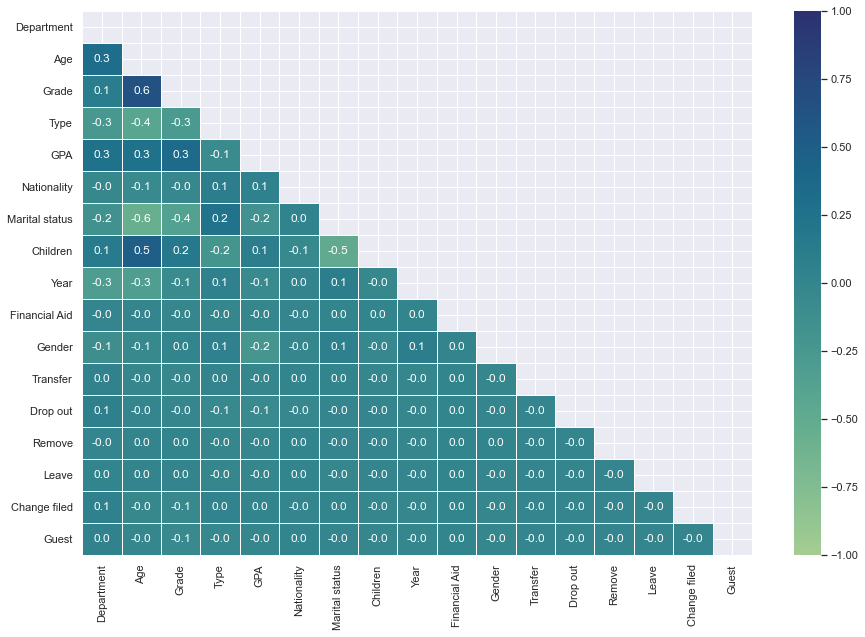

In [75]:
plt.figure(figsize=(15,10))
plt.figure(figsize=(15,10))
#sns.set_theme(style="white")

# Getting the Upper Triangle of the co-relation matrix
corr = df_test.corr()
#matrix = np.triu(corr)
#mask = np.triu(np.ones_like(corr, dtype=bool))
matrix = np.triu(np.ones_like(corr))


cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

#sns.heatmap(df_test.corr(), annot=True, linewidth=.5, vmin = -1, vmax = 1,cmap = plt.cm.CMRmap_r, fmt=".1f", mask=matrix);
#sns.heatmap(df_test.corr(), annot=True, linewidth=.5, vmin = -1, vmax = 1,cmap = cmap, fmt=".1f", mask=matrix);
sns.heatmap(df_test.corr(), annot=True, linewidth=.5, vmin = -1, vmax = 1, cmap="crest", fmt=".1f", mask=matrix);

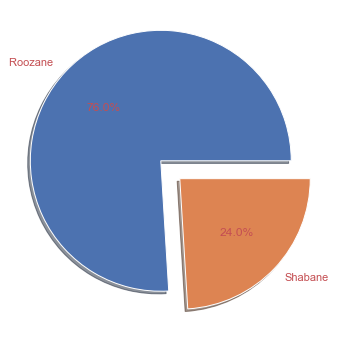

In [121]:
plt.figure(figsize=(8,6))
counts_male = df_test[df_test['Type']==1].shape[0]
counts_female = df_test[df_test['Type']==0].shape[0]
plt.pie([counts_male, counts_female], explode=[0.1,0.1], shadow=True, labels=['Roozane ','Shabane'], textprops={'color':"r"}, autopct='%1.1f%%');

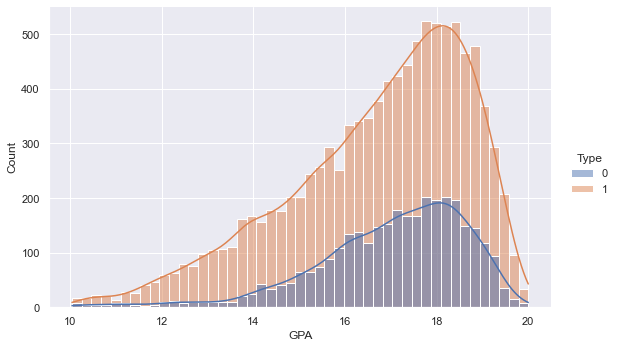

In [77]:
sns.displot(df_test, x= 'GPA', hue=df_test['Type'], kde=True, height=5, aspect=1.6)

In [78]:
df_test.dropna(inplace=True)
df_test.isna().sum()

Department        0
Age               0
Grade             0
Type              0
GPA               0
Nationality       0
Marital status    0
Children          0
Year              0
Financial Aid     0
Gender            0
Transfer          0
Drop out          0
Remove            0
Leave             0
Change filed      0
Guest             0
dtype: int64

## Type 

<Axes: >

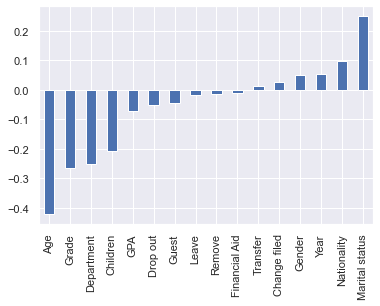

In [79]:
sns.set()
df_test.corr()['Type'].sort_values()[:-1].plot(kind='bar', grid=1)

In [80]:
print(df_test.corr()['Type'].sort_values()[:-1])

Age              -0.419265
Grade            -0.265730
Department       -0.252482
Children         -0.206222
GPA              -0.070848
Drop out         -0.051805
Guest            -0.045979
Leave            -0.016359
Remove           -0.014091
Financial Aid    -0.010806
Transfer          0.014016
Change filed      0.025521
Gender            0.051291
Year              0.052820
Nationality       0.098138
Marital status    0.248722
Name: Type, dtype: float64


## Logistic Regression

In [82]:
X = df_test.drop(['Type'], axis=1) 
y = df_test['Type']

print("Columns for training:", list(X.columns.values)) 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
preds = logmodel.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = logmodel.get_params()
#print(params)

#Print model parameters
#print('Intercept: \n', logmodel.intercept_)
#print('Coefficients: \n', logmodel.coef_)

#Create a confusion matrix
print('Confusion matrix:\n', confusion_matrix(y_test, preds))

#Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

print("Score in test set:", logmodel.score(X_test, y_test))
print("Score in train set:", logmodel.score(X_train, y_train))

Columns for training: ['Department', 'Age', 'Grade', 'GPA', 'Nationality', 'Marital status', 'Children', 'Year', 'Financial Aid', 'Gender', 'Transfer', 'Drop out', 'Remove', 'Leave', 'Change filed', 'Guest']
Confusion matrix:
 [[ 198  472]
 [ 103 1969]]
Accuracy Score: 0.7902990517870168
              precision    recall  f1-score   support

           0       0.66      0.30      0.41       670
           1       0.81      0.95      0.87      2072

    accuracy                           0.79      2742
   macro avg       0.73      0.62      0.64      2742
weighted avg       0.77      0.79      0.76      2742

Score in test set: 0.7902990517870168
Score in train set: 0.7886386432023342


In [83]:
coeff_df = pd.DataFrame(logmodel.coef_.reshape(-1),index=X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Department,-0.485864
Age,-0.980991
Grade,-0.165204
GPA,0.224619
Nationality,0.151579
Marital status,0.007977
Children,0.111204
Year,-0.344750
Financial Aid,-0.038185
Gender,0.111629


Variable: GPA                  Importance: 0.225
Variable: Nationality          Importance: 0.152
Variable: Gender               Importance: 0.112
Variable: Children             Importance: 0.111
Variable: Change filed         Importance: 0.089
Variable: Transfer             Importance: 0.044
Variable: Marital status       Importance: 0.008
Variable: Leave                Importance: -0.014
Variable: Remove               Importance: -0.022
Variable: Financial Aid        Importance: -0.038
Variable: Drop out             Importance: -0.077
Variable: Guest                Importance: -0.133
Variable: Grade                Importance: -0.165
Variable: Year                 Importance: -0.345
Variable: Department           Importance: -0.486
Variable: Age                  Importance: -0.981


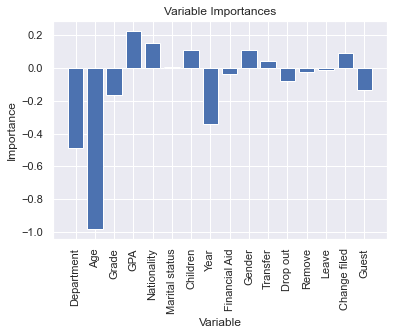

In [84]:
# Get numerical feature importances
feature_list = X.columns

importances = list(logmodel.coef_.reshape(-1))

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
plt.grid(True)

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

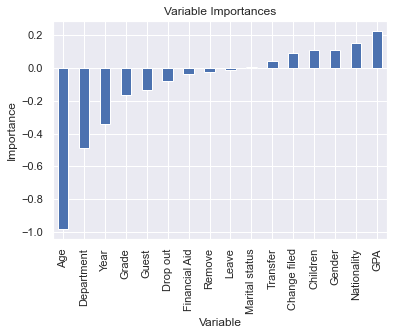

In [85]:
coeff_df['Coefficient'].sort_values()[:].plot(kind='bar', grid=1)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

## simple NN 

In [15]:
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from keras.layers import Input, Activation, Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from tensorflow import keras
from keras.callbacks import EarlyStopping

In [16]:
model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/300
343/343 [==============================] - 1s 2ms/step - loss: 0.4795 - accuracy: 0.7803 - val_loss: 0.4161 - val_accuracy: 0.7980
Epoch 2/300
343/343 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8004 - val_loss: 0.3972 - val_accuracy: 0.8078
Epoch 3/300
343/343 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.8097 - val_loss: 0.3929 - val_accuracy: 0.8129
Epoch 4/300
343/343 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8124 - val_loss: 0.3920 - val_accuracy: 0.8129
Epoch 5/300
343/343 [==============================] - 0s 1ms/step - loss: 0.3811 - accuracy: 0.8135 - val_loss: 0.3885 - val_accuracy: 0.8096
Epoch 6/300
343/343 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.8151 - val_loss: 0.3862 - val_accuracy: 0.8115
Epoch 7/300
343/343 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8127 - val_loss: 0.3887 - val_accuracy: 0.8129

343/343 [==============================] - 0s 717us/step


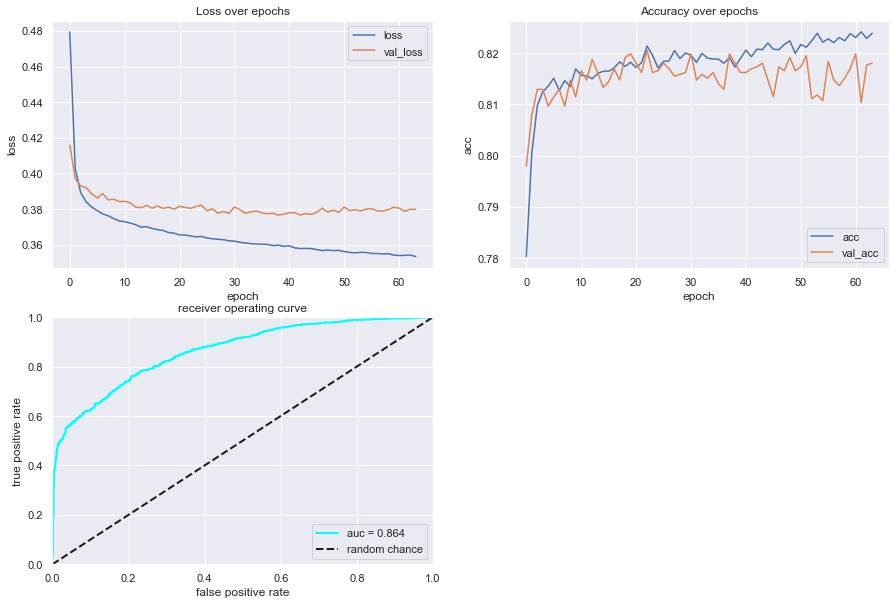

86/86 [==============================] - 0s 1ms/step


In [17]:
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix

def loss_accuracy_plotter(history):
    # plot loss vs epoch
    plt.figure(figsize=(15,10))
    ax = plt.subplot(2, 2, 1)
    ax.plot(history.history['loss'], label='loss')
    ax.plot(history.history['val_loss'], label='val_loss')
    ax.legend(loc="upper right")
    ax.set_title('Loss over epochs')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')

    # plot accuracy vs epoch
    ax = plt.subplot(2, 2, 2)
    ax.plot(history.history['accuracy'], label='acc')
    ax.plot(history.history['val_accuracy'], label='val_acc')
    ax.legend(loc="lower right")
    ax.set_title('Accuracy over epochs')
    ax.set_xlabel('epoch')
    ax.set_ylabel('acc')

    # Plot ROC
    Y_predict = model.predict(X_test)
    Y_predict_train = model.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_test, Y_predict)
    roc_auc = auc(fpr, tpr)
    ax = plt.subplot(2, 2, 3)
    ax.plot(fpr, tpr, lw=2, color='cyan', label='auc = %.3f' % (roc_auc))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
    ax.set_xlim([0, 1.0])
    ax.set_ylim([0, 1.0])
    ax.set_xlabel('false positive rate')
    ax.set_ylabel('true positive rate')
    ax.set_title('receiver operating curve')
    ax.legend(loc="lower right")
    plt.show()

loss_accuracy_plotter(history)
Y_predict = model.predict(X_test)
fpr_NN, tpr_NN, thresholds_NN = roc_curve(y_test, Y_predict)

In [18]:
predictions = model.predict(X_test).round()
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

86/86 [==============================] - 0s 818us/step
              precision    recall  f1-score   support

           0       0.69      0.46      0.55       670
           1       0.84      0.94      0.89      2072

    accuracy                           0.82      2742
   macro avg       0.77      0.70      0.72      2742
weighted avg       0.81      0.82      0.80      2742

[[ 305  365]
 [ 134 1938]]


65/65 [==============================] - 0s 834us/step


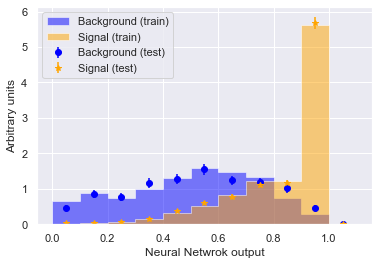

In [104]:
def compare_train_test(clf, X_train, y_train, X_test, y_test, xlabel):
    decisions = [] # list to hold decisions of classifier
    for X,y in ((X_train, y_train), (X_test, y_test)): # train and test
        d1 = clf.predict(X[y<0.5]) # background
        d2 = clf.predict(X[y>0.5]) # signal
        decisions += [d1, d2] # add to list of classifier decision

    highest_decision = max(np.max(d) for d in decisions) # get maximum score
    bin_edges = [] # list to hold bin edges
    bin_edge = -0.1 # start counter for bin_edges
    while bin_edge < highest_decision: # up to highest score
        bin_edge += 0.1 # increment
        bin_edges.append(bin_edge)

    # Training plots
    plt.hist(decisions[0], # background in train set
            bins=bin_edges, # lower and upper range of the bins
            density=True, # area under the histogram will sum to 1
            histtype='stepfilled', # lineplot that's filled
            color='blue', label='Background (train)', # Background (train)
            alpha=0.5 ) # half transparency
    plt.hist(decisions[1], # signal in train set
            bins=bin_edges, # lower and upper range of the bins
            density=True, # area under the histogram will sum to 1
            histtype='stepfilled', # lineplot that's filled
            color='orange', label='Signal (train)', # Signal (train)
            alpha=0.5 ) # half transparency

    # Testing plots
    hist_background, bin_edges = np.histogram(decisions[2], # background test
                                            bins=bin_edges, # number of bins in function definition
                                            density=True ) # area under the histogram will sum to 1

    scale = len(decisions[2]) / sum(hist_background) # between raw and normalised
    err_background = np.sqrt(hist_background * scale) / scale # error on test background

    width = 0.1 # histogram bin width
    center = (bin_edges[:-1] + bin_edges[1:]) / 2 # bin centres

    plt.errorbar(x=center, y=hist_background, yerr=err_background, fmt='o', # circles
                c='blue', label='Background (test)' ) # Background (test)

    hist_signal, bin_edges = np.histogram(decisions[3], # siganl test
                                        bins=bin_edges, # number of bins in function definition
                                        density=True ) # area under the histogram will sum to 1

    scale = len(decisions[3]) / sum(hist_signal) # between raw and normalised
    err_signal = np.sqrt(hist_signal * scale) / scale # error on test background

    plt.errorbar(x=center, y=hist_signal, yerr=err_signal, fmt='*', # circles
                c='orange', label='Signal (test)' ) # Signal (test)

    plt.xlabel(xlabel) # write x-axis label
    plt.ylabel("Arbitrary units") # write y-axis label
    plt.legend() # add legend

compare_train_test(model, X_train, y_train, X_test, y_test, 'Neural Netwrok output')

## NN Hyperparameter optimization

In [19]:
X_train.shape[1]

16

In [20]:
NDIM = X_train.shape[1]

def main():
    keras_pipeline = Pipeline([("scaler", StandardScaler()),
                               ("clf", keras.wrappers.scikit_learn.KerasClassifier(
                                   build_fn=make_model))
    ])
    
    param_grid = {'clf__network_layers': [(32, 32), (64, 64), (128, 128, 128)],
     'clf__batch_size': [64, 128, 256, 512],
     'clf__epochs': [50, 100, 200, 300],
     'clf__dropout_rate': [0.1, 0.01],
     'clf__optimizer': ['Nadam', 'Adam'],
     'clf__activation': ['selu', 'relu', 'tanh'],
     'clf__k_initializer': ['lecun_normal', 'normal'],
     'clf__verbose': [0]
    }
    
    rs_keras = RandomizedSearchCV(keras_pipeline,
                                  param_distributions=param_grid,
                                  cv=5, refit=True,
                                  verbose=0,
                                  n_iter=5,
                                  scoring="accuracy")
    
    history = rs_keras.fit(np.array(X_train),
                 np.array(y_train))
    
    print('Best score obtained: {0}'.format(rs_keras.best_score_))
    print('Parameters:')
    for param, value in rs_keras.best_params_.items():
        print('\t{}: {}'.format(param, value))
    return  rs_keras  

def make_model(network_layers=[(32, 32)],
               dropout_rate=0,
               optimizer="Nadam",
               activation="selu",
               k_initializer='lecun_normal',
               n_input=NDIM,
               n_class=1):
    
    model = keras.models.Sequential()

    for index, layers in enumerate(network_layers):
        if not index:
            model.add(keras.layers.Dense(layers,
                                         input_dim=n_input,
                                         activation=activation,
                                         kernel_initializer=k_initializer))
        else:
            model.add(keras.layers.Dense(layers,
                                         kernel_initializer=k_initializer,
                                         activation=activation))
        if dropout_rate and index:
            model.add(keras.layers.AlphaDropout(dropout_rate))

    model.add(keras.layers.Dense(n_class,
                                 activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    #print(model.summary())
    return model

if __name__ == '__main__':
    opt_model = main()

<ipython-input-20-569e355031fb>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ("clf", keras.wrappers.scikit_learn.KerasClassifier(


69/69 [==============================] - 0s 2ms/step
Best score obtained: 0.8118899905683161
Parameters:
	clf__verbose: 0
	clf__optimizer: Adam
	clf__network_layers: (32, 32)
	clf__k_initializer: lecun_normal
	clf__epochs: 300
	clf__dropout_rate: 0.1
	clf__batch_size: 256
	clf__activation: tanh


In [ ]:
'''
Best score obtained: 0.8118899905683161
Parameters:
	clf__verbose: 0
	clf__optimizer: Adam
	clf__network_layers: (32, 32)
	clf__k_initializer: lecun_normal
	clf__epochs: 300
	clf__dropout_rate: 0.1
	clf__batch_size: 256
	clf__activation: tanh
'''

In [21]:
# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

drop_model = models.Sequential()
drop_model.add(layers.Dense(32,  kernel_initializer='lecun_normal', activation='tanh', input_shape=(NDIM,)))
drop_model.add(layers.Dropout(0.1))
drop_model.add(layers.Dense(32,  kernel_initializer='lecun_normal', activation='tanh'))
drop_model.add(layers.Dropout(0.1))
drop_model.add(layers.Dense(1, kernel_initializer='lecun_normal', activation='sigmoid'))

# compile the model
drop_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
# print the model summary
drop_model.summary()

# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, mode='min')

# Train classifier
import time
start = time.time() # time at start of whole processing

drop_history = drop_model.fit(X_train, 
                    y_train, 
                    epochs=300, 
                    batch_size=256, 
                    verbose=1, # switch to 1 for more verbosity 
                    callbacks=[early_stopping], 
                    validation_data=(X_test,y_test)
                    )

elapsed = time.time() - start # time after whole processing
print("Time taken: "+str(round(elapsed,1))+"s") # print total time taken to process every file

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_87 (Dense)            (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_88 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
43/43 [==============================] 

In [22]:
predictions_opt = drop_model.predict(X_test).round()
print(classification_report(y_test,predictions_opt))
print(confusion_matrix(y_test,predictions_opt))

86/86 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.70      0.45      0.55       670
           1       0.84      0.94      0.89      2072

    accuracy                           0.82      2742
   macro avg       0.77      0.69      0.72      2742
weighted avg       0.81      0.82      0.80      2742

[[ 301  369]
 [ 129 1943]]


343/343 [==============================] - 0s 1ms/step


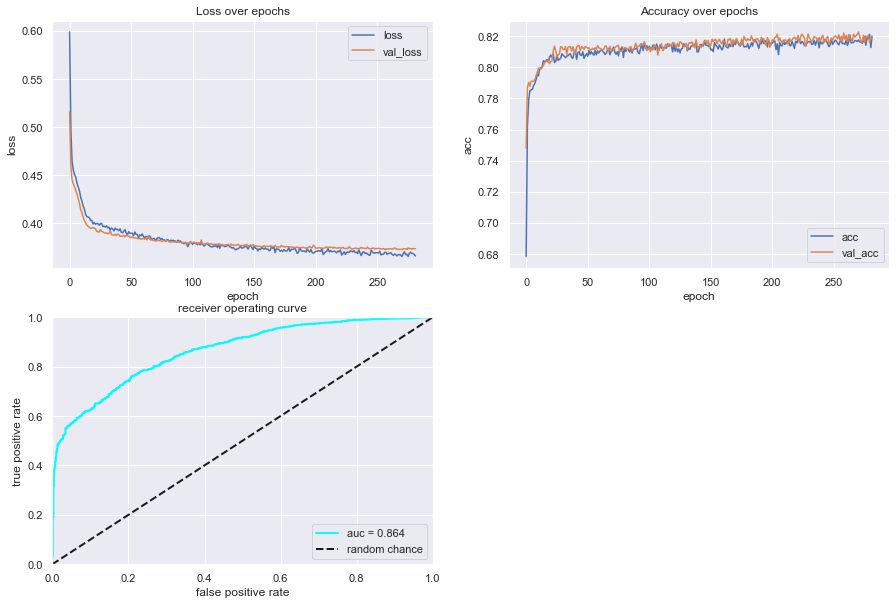

86/86 [==============================] - 0s 898us/step


In [23]:
loss_accuracy_plotter(drop_history)
Y_predict_opt = drop_model.predict(X_test)
fpr_NN_opt, tpr_NN_opt, thresholds_NN_opt = roc_curve(y_test, Y_predict_opt)

65/65 [==============================] - 0s 2ms/step


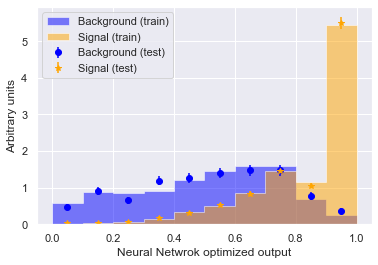

In [106]:
compare_train_test(drop_model, X_train, y_train, X_test, y_test, 'Neural Netwrok optimized output')

## BDT Classifier

              precision    recall  f1-score   support

           0       0.54      0.53      0.54       670
           1       0.85      0.85      0.85      2072

    accuracy                           0.77      2742
   macro avg       0.69      0.69      0.69      2742
weighted avg       0.77      0.77      0.77      2742

[[ 356  314]
 [ 304 1768]]
Variable: GPA                  Importance: 0.402
Variable: Grade                Importance: 0.181
Variable: Age                  Importance: 0.151
Variable: Department           Importance: 0.087
Variable: Year                 Importance: 0.087
Variable: Gender               Importance: 0.031
Variable: Marital status       Importance: 0.022
Variable: Children             Importance: 0.015
Variable: Nationality          Importance: 0.012
Variable: Guest                Importance: 0.007
Variable: Drop out             Importance: 0.003
Variable: Financial Aid        Importance: 0.001
Variable: Remove               Importance: 0.001
Variable:

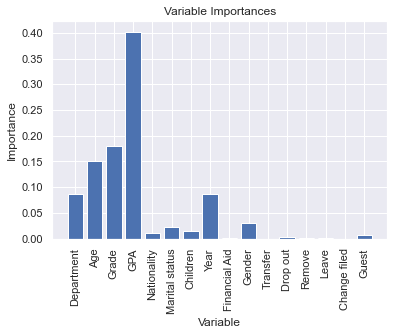

In [107]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, predictions)

# Set the style
#plt.style.use('fivethirtyeight')

# Get numerical feature importances

feature_list = feature_list = list(df_test.drop(['Type'], axis=1).columns)

importances = list(dtree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

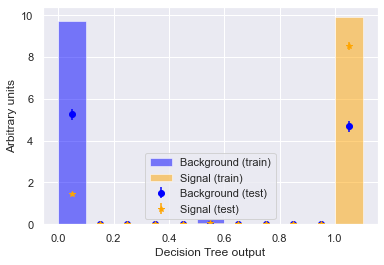

In [109]:
def compare_train_test(clf, X_train, y_train, X_test, y_test, xlabel):
    decisions = [] # list to hold decisions of classifier
    for X,y in ((X_train, y_train), (X_test, y_test)): # train and test
        d1 = clf.predict_proba(X[y<0.5])[:, 1] # background
        d2 = clf.predict_proba(X[y>0.5])[:, 1] # signal
        decisions += [d1, d2] # add to list of classifier decision

    highest_decision = max(np.max(d) for d in decisions) # get maximum score
    bin_edges = [] # list to hold bin edges
    bin_edge = -0.1 # start counter for bin_edges
    while bin_edge < highest_decision: # up to highest score
        bin_edge += 0.1 # increment
        bin_edges.append(bin_edge)

    # Training plots
    plt.hist(decisions[0], # background in train set
            bins=bin_edges, # lower and upper range of the bins
            density=True, # area under the histogram will sum to 1
            histtype='stepfilled', # lineplot that's filled
            color='blue', label='Background (train)', # Background (train)
            alpha=0.5 ) # half transparency
    plt.hist(decisions[1], # signal in train set
            bins=bin_edges, # lower and upper range of the bins
            density=True, # area under the histogram will sum to 1
            histtype='stepfilled', # lineplot that's filled
            color='orange', label='Signal (train)', # Signal (train)
            alpha=0.5 ) # half transparency

    # Testing plots
    hist_background, bin_edges = np.histogram(decisions[2], # background test
                                            bins=bin_edges, # number of bins in function definition
                                            density=True ) # area under the histogram will sum to 1

    scale = len(decisions[2]) / sum(hist_background) # between raw and normalised
    err_background = np.sqrt(hist_background * scale) / scale # error on test background

    width = 0.1 # histogram bin width
    center = (bin_edges[:-1] + bin_edges[1:]) / 2 # bin centres

    plt.errorbar(x=center, y=hist_background, yerr=err_background, fmt='o', # circles
                c='blue', label='Background (test)' ) # Background (test)

    hist_signal, bin_edges = np.histogram(decisions[3], # siganl test
                                        bins=bin_edges, # number of bins in function definition
                                        density=True ) # area under the histogram will sum to 1

    scale = len(decisions[3]) / sum(hist_signal) # between raw and normalised
    err_signal = np.sqrt(hist_signal * scale) / scale # error on test background

    plt.errorbar(x=center, y=hist_signal, yerr=err_signal, fmt='*', # circles
                c='orange', label='Signal (test)' ) # Signal (test)

    plt.xlabel(xlabel) # write x-axis label
    plt.ylabel("Arbitrary units") # write y-axis label
    plt.legend() # add legend


compare_train_test(dtree, X_train, y_train, X_test, y_test, 'Decision Tree output')

## Random Forest

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       670
           1       0.86      0.88      0.87      2072

    accuracy                           0.80      2742
   macro avg       0.72      0.71      0.72      2742
weighted avg       0.79      0.80      0.79      2742

[[ 371  299]
 [ 257 1815]]
Variable: GPA                  Importance: 0.425
Variable: Age                  Importance: 0.205
Variable: Grade                Importance: 0.122
Variable: Department           Importance: 0.075
Variable: Year                 Importance: 0.075
Variable: Marital status       Importance: 0.028
Variable: Children             Importance: 0.024
Variable: Gender               Importance: 0.021
Variable: Nationality          Importance: 0.012
Variable: Guest                Importance: 0.006
Variable: Drop out             Importance: 0.004
Variable: Financial Aid        Importance: 0.001
Variable: Remove               Importance: 0.001
Variable:

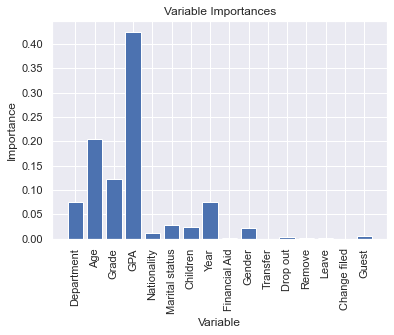

In [112]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rfc_pred)

# Set the style
#plt.style.use('fivethirtyeight')

# Get numerical feature importances

feature_list = feature_list = list(df_test.drop(['Type'], axis=1).columns)

importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

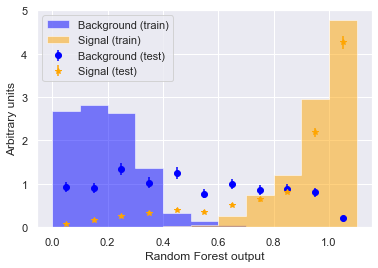

In [113]:
compare_train_test(rfc, X_train, y_train, X_test, y_test, 'Random Forest output')

## Random Forest optimization

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

rf = RandomForestClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [115]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [116]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='accuracy', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [117]:
best_random = rf_random.best_estimator_
pprint(best_random.get_params())

best_random_pred = best_random.predict(X_test).round()
print(classification_report(y_test,best_random_pred))
print(confusion_matrix(y_test,best_random_pred))

fpr_rf_opt, tpr_rf_opt, thresholds_rf_opt = roc_curve(y_test, best_random_pred)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
              precision    recall  f1-score   support

           0       0.72      0.41      0.52       670
           1       0.83      0.95      0.89      2072

    accuracy                           0.82      2742
   macro avg       0.78      0.68      0.70      2742
weighted avg       0.81      0.82      0.80      2742

[[ 275  395]
 [ 107 1965]]


Variable: Grade                Importance: 0.32
Variable: Age                  Importance: 0.24
Variable: Department           Importance: 0.13
Variable: GPA                  Importance: 0.12
Variable: Children             Importance: 0.06
Variable: Marital status       Importance: 0.05
Variable: Year                 Importance: 0.04
Variable: Nationality          Importance: 0.02
Variable: Gender               Importance: 0.01
Variable: Drop out             Importance: 0.01
Variable: Guest                Importance: 0.01
Variable: Financial Aid        Importance: 0.0
Variable: Transfer             Importance: 0.0
Variable: Remove               Importance: 0.0
Variable: Leave                Importance: 0.0
Variable: Change filed         Importance: 0.0


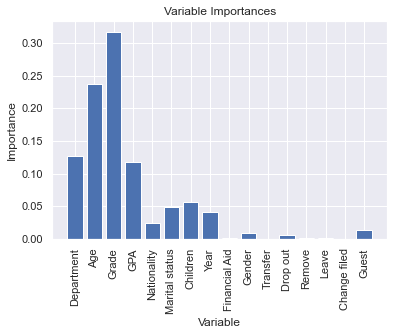

In [118]:
# Get numerical feature importances

importances = list(best_random.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

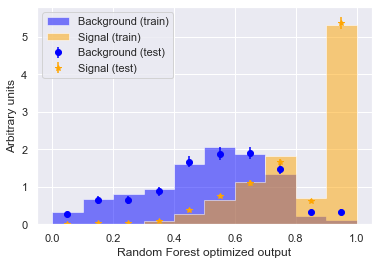

In [119]:
compare_train_test(best_random, X_train, y_train, X_test, y_test, 'Random Forest optimized output')

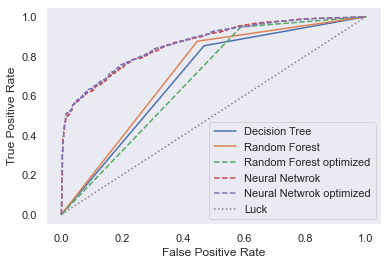

In [120]:
# plot ROC curve
plt.plot(fpr_dt, tpr_dt, label='Decision Tree') # plot random forest ROC
plt.plot(fpr_rf, tpr_rf, label='Random Forest') # plot random forest ROC
plt.plot(fpr_rf_opt, tpr_rf_opt, linestyle='dashed', label='Random Forest optimized') # plot random forest optimized ROC
plt.plot(fpr_NN, tpr_NN, linestyle='dashed', label='Neural Netwrok') # plot neural network ROC
plt.plot(fpr_NN_opt, tpr_NN_opt, linestyle='dashed', label='Neural Netwrok optimized') # plot neural network ROC
plt.plot([0, 1], [0, 1], linestyle='dotted', color='grey', label='Luck') # plot diagonal line to indicate luck
plt.xlabel('False Positive Rate') # x-axis label
plt.ylabel('True Positive Rate') # y-axis label
plt.grid() # add a grid to the plot
plt.legend() # add a legend

## Other Classifiers

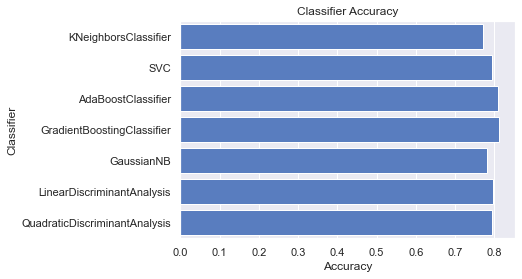

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    #DecisionTreeClassifier(),
 	#RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=30, random_state=420),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
    #LogisticRegression()]
]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

dataset_X = df_test.drop(['Type'], axis=1).values
dataset_y = df_test['Type'].values

for train_index, test_index in sss.split(scaler.transform(dataset_X), dataset_y):
	X_train, X_test = dataset_X[train_index], dataset_X[test_index]
	y_train, y_test = dataset_y[train_index], dataset_y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)	
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0		# for 10 times accuracy is computed and the final accuracy is the average over 10
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b");